In [ ]:
#Importing Dependencies
import os
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import pydotplus
import pydot
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [ ]:
#sk-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [ ]:
#keras
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
# from keras.layers.embeddings import Embedding
from keras.layers import Embedding
from keras.utils import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint , EarlyStopping
from keras.layers import Input , Dense , Flatten , LSTM , GRU, Conv1D,Conv2D, MaxPooling1D, Dropout, Activation, Concatenate

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/NLP_ML_PROJECT/Work/ISEAR_Clean(1).csv')

In [ ]:
df[df['Emotion']=='fear'].sample(5)

,Emotion,Statement
4078,fear,When they tried to rob me.
2255,fear,I feel afraid of the way a great friend looks ...
2328,fear,"I was walking from my friend's house, a few bl..."
6435,fear,Somebody told her friend that she would hit me...
4636,fear,The shooting started and we all lay down to pr...


In [ ]:
df['Emotion'].unique()

array(['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt'],
      dtype=object)

In [ ]:
X_train , Y_train = df['Statement'].to_numpy(),df['Emotion']
tokenizer = Tokenizer(num_words=200000)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
X_train_encoded = pad_sequences (sequences, maxlen=30)

In [ ]:

le = LabelEncoder()

Y_train_encoded = le.fit_transform(Y_train)

Y_train_encoded = to_categorical(Y_train_encoded)


In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split( X_train_encoded, Y_train_encoded, test_size=0.33, random_state=42)

In [ ]:
embeddings_index = {}
with open("/content/drive/MyDrive/NLP_ML_PROJECT/Resources/glove.6B.300d.txt",encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
VOCAB_SIZE = len(tokenizer.word_index) + 2
EMBEDDING_DIM = 300
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 8302 words (831 misses)


In [ ]:
df['Emotion'].unique()

array(['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt'],
      dtype=object)

In [ ]:
def LSTM_model(task):
    model = Sequential()
    model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, weights = [embedding_matrix], trainable=True, input_length=X_train1.shape[1]))
    #model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=X_train_encoded.shape[1]))
    model.add(LSTM(128,activation='relu',return_sequences=True))
    model.add(LSTM(128,activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(100,activation='relu'))


    model.add(Dense(7, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


    return model

In [ ]:
LSTM_model("task").summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 30, 300)           2740500   
                                                                 
 lstm_8 (LSTM)               (None, 30, 128)           219648    
                                                                 
 lstm_9 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 100)               12900     
                                                                 
 dense_8 (Dense)             (None, 7)                

In [ ]:
LSTM_model("task").summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 300)           2740500   
                                                                 
 lstm (LSTM)                 (None, 30, 128)           219648    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                                 
 dense_2 (Dense)             (None, 7)                 7

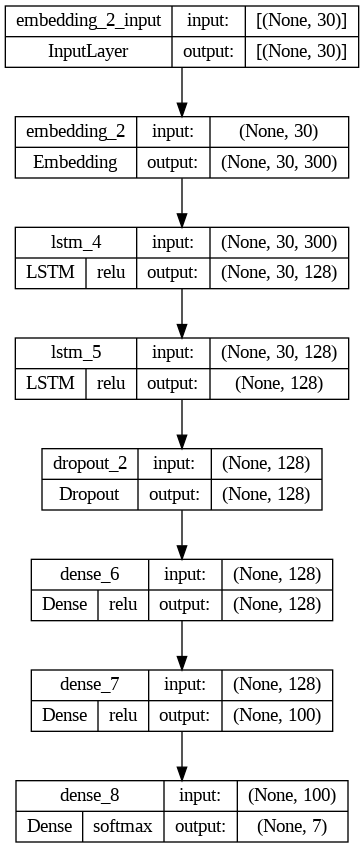

In [ ]:
tf.keras.utils.plot_model(
LSTM_model("task"),
to_file="LSTM.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

In [ ]:
def GRU_model(task):
    model = Sequential()
    model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, weights = [embedding_matrix], trainable=True, input_length=X_train1.shape[1]))
    #model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=X_train_encoded.shape[1]))
    model.add(GRU(128,activation='relu',return_sequences=True))
    model.add(GRU(128,activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(100,activation='relu'))


    model.add(Dense(7, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


    return model

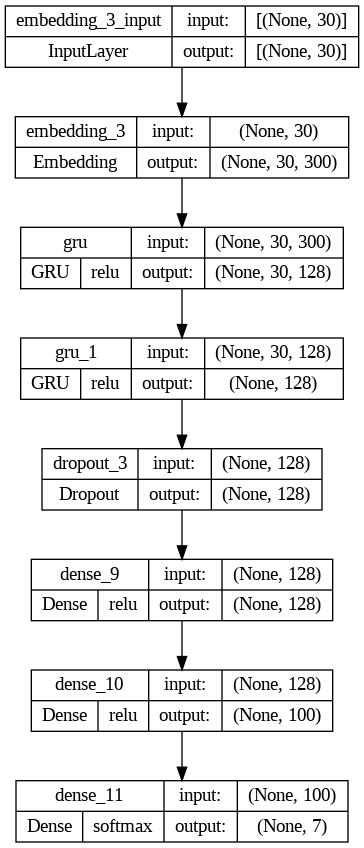

In [ ]:
tf.keras.utils.plot_model(
GRU_model("task"),
to_file="GRU.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

In [ ]:
def CNN_model(task):
    Input_layer     = Input(shape = X_train_encoded.shape[1], name="Input_layer")
    Embedding_layer = Embedding(VOCAB_SIZE, EMBEDDING_DIM,weights = [embedding_matrix],trainable=True, input_length=X_train1.shape[1], name="Embedding_layer")(Input_layer)
    #Embedding_layer = Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=X_train_encoded.shape[1])(Input_layer)
    CNN1_layer1     = Conv1D(100, kernel_size=2, padding="same", activation="relu")(Embedding_layer)
    CNN1_layer2     = Conv1D(100, kernel_size=3, padding="same", activation="relu")(Embedding_layer)
    CNN1_layer3     = Conv1D(100, kernel_size=4, padding="same", activation="relu")(Embedding_layer)
    Concat_layer1   = Concatenate(axis=1)([CNN1_layer1, CNN1_layer2, CNN1_layer3])
    Pool_layer1     = MaxPooling1D(pool_size=2)(Concat_layer1)
    CNN2_layer1     = Conv1D(100, kernel_size=2, padding="same", activation="relu")(Pool_layer1)
    CNN2_layer2     = Conv1D(100, kernel_size=3, padding="same", activation="relu")(Pool_layer1)
    CNN2_layer3     = Conv1D(100, kernel_size=4, padding="same", activation="relu")(Pool_layer1)
    Concat_layer2   = Concatenate(axis=1)([CNN2_layer1, CNN2_layer2, CNN2_layer3])
    Pool_layer2     = MaxPooling1D(pool_size=2)(Concat_layer2)
    Flatten_layer   = Flatten()(Pool_layer2)
    Dense_layer1    = Dense(128,activation='relu', name="Dense_layer1a")(Flatten_layer)
    Dense_layer2    = Dense(100,activation='relu', name="Dense_layer1b")(Dense_layer1)

    predictions_task1 = Dense(7, activation='softmax', name="predictions_task1")(Dense_layer2)
    model= tf.keras.models.Model(Input_layer,predictions_task1)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

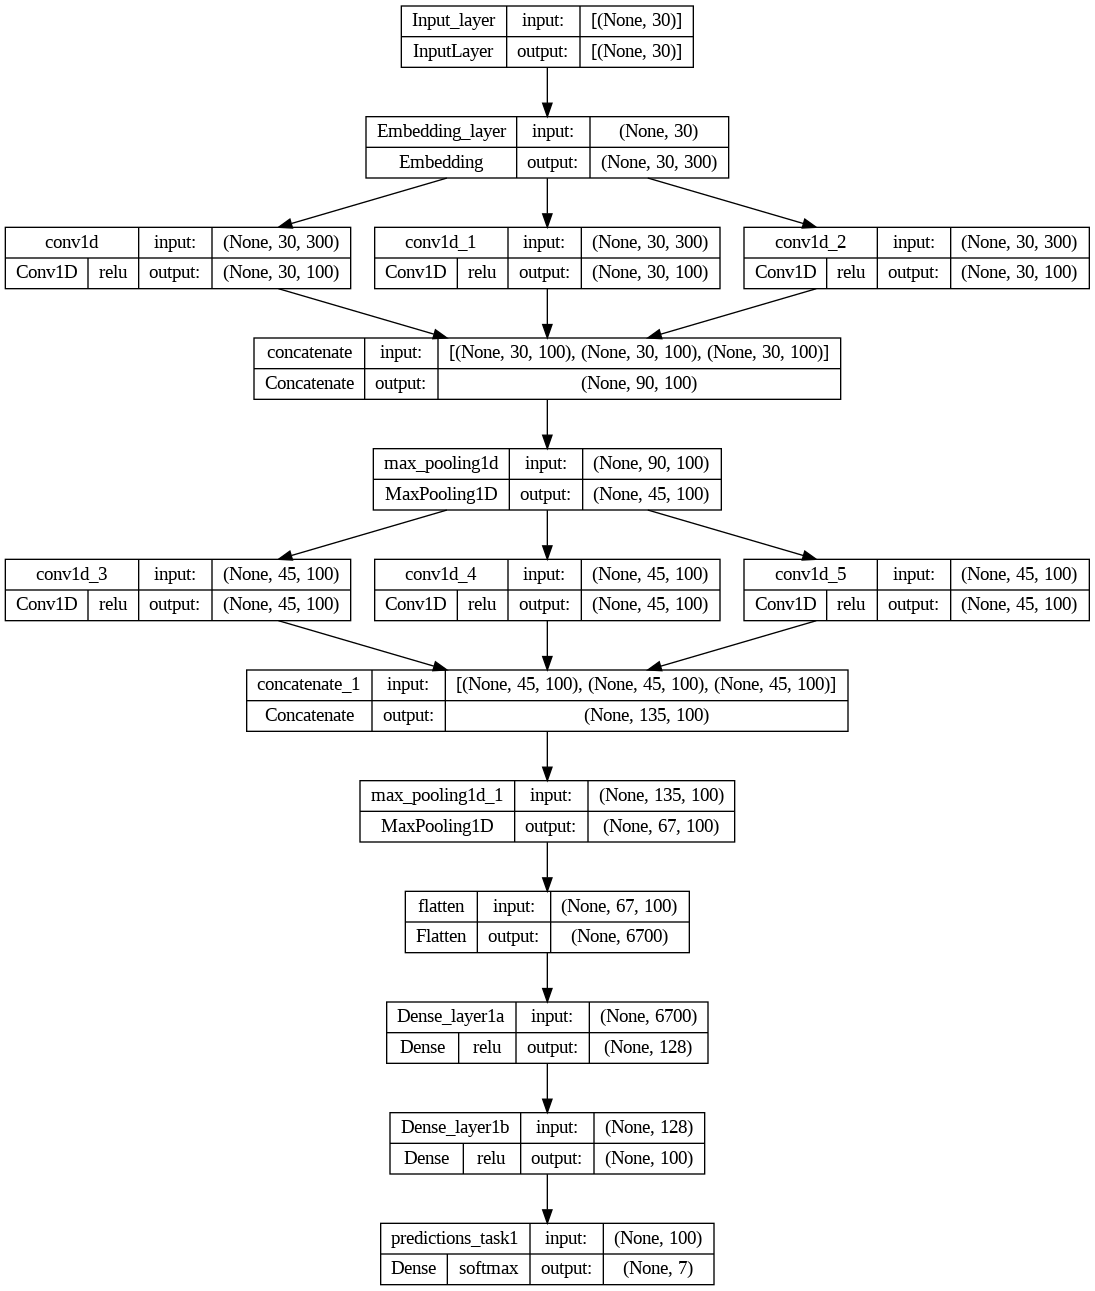

In [ ]:
tf.keras.utils.plot_model(
CNN_model("task"),
to_file="CNN.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

In [ ]:
def getAccuracy(model, X, Y):
  # epoch =40
    history = model.fit(X,Y, epochs=40, batch_size=64,validation_split=0.1,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
    # X_train1, X_test1, y_train1, y_test1
    Y1= np.argmax(model.predict(X_test1),axis=1)

    # print(Y1)
    Y=np.argmax(y_test1,axis=1)
    # print("@@@@")
    # print(Y)
    print(classification_report(np.array(le.inverse_transform(Y)),np.array(le.inverse_transform(Y1))))

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    return history.history['accuracy'],history.history['val_accuracy']

In [ ]:
task1 = "Classification"
task2 = "Regression"

Results_Task1=dict()
Results_Task2=dict()

LSTM Model


Epoch 1/40
71/71 [==============================] - 20s 228ms/step - loss: 1.8262 - accuracy: 0.2628 - val_loss: 1.6099 - val_accuracy: 0.3547
Epoch 2/40
71/71 [==============================] - 12s 173ms/step - loss: 1.3519 - accuracy: 0.4802 - val_loss: 1.3442 - val_accuracy: 0.4950
Epoch 3/40
71/71 [==============================] - 12s 171ms/step - loss: 1.0976 - accuracy: 0.5944 - val_loss: 1.3334 - val_accuracy: 0.5210
Epoch 4/40
71/71 [==============================] - 10s 135ms/step - loss: 0.8753 - accuracy: 0.6884 - val_loss: 1.2873 - val_accuracy: 0.5651
Epoch 5/40
71/71 [==============================] - 10s 145ms/step - loss: 0.6450 - accuracy: 0.7715 - val_loss: 1.5509 - val_accuracy: 0.5992
Epoch 6/40
71/71 [==============================] - 10s 145ms/step - loss: 0.5031 - accuracy: 0.8252 - val_loss: 1.7374 - val_accuracy: 0.5471
Epoch 7/40
77/77 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

       an

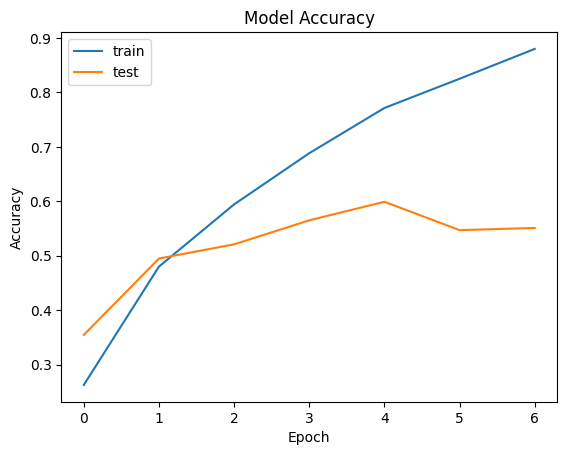

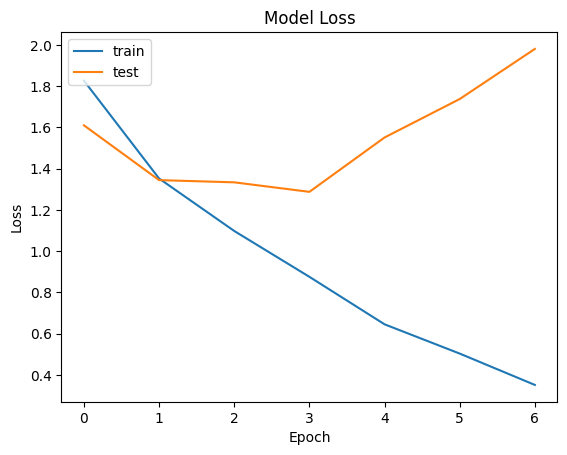

In [ ]:
print("LSTM Model\n\n")
# X_train1, X_test1, y_train1, y_test1
acc, val_acc = getAccuracy(LSTM_model("task1"), X_train1, y_train1)
LSTM={'Accuracy':acc[-1],'Val_Accuracy':val_acc[-1]}

In [ ]:
    from sklearn.metrics import classification_report, confusion_matrix

GRU Model


Epoch 1/40
71/71 [==============================] - 25s 284ms/step - loss: 1.8782 - accuracy: 0.2256 - val_loss: 1.6390 - val_accuracy: 0.3768
Epoch 2/40
71/71 [==============================] - 15s 215ms/step - loss: 1.4043 - accuracy: 0.4784 - val_loss: 1.2207 - val_accuracy: 0.5591
Epoch 3/40
71/71 [==============================] - 13s 186ms/step - loss: 1.0191 - accuracy: 0.6307 - val_loss: 1.2167 - val_accuracy: 0.5792
Epoch 4/40
71/71 [==============================] - 12s 171ms/step - loss: 0.7787 - accuracy: 0.7265 - val_loss: 1.2811 - val_accuracy: 0.5952
Epoch 5/40
71/71 [==============================] - 13s 189ms/step - loss: 0.5484 - accuracy: 0.8227 - val_loss: 1.5249 - val_accuracy: 0.5772
Epoch 6/40
77/77 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

       anger       0.39      0.56      0.46       374
     disgust       0.55      0.59      0.57       365
        fear       0.68      0.68      0.68  

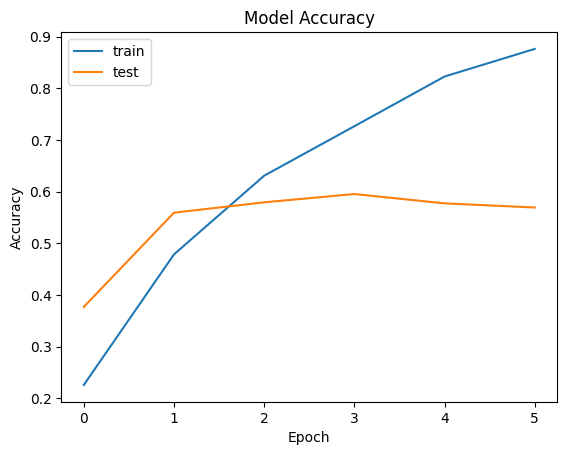

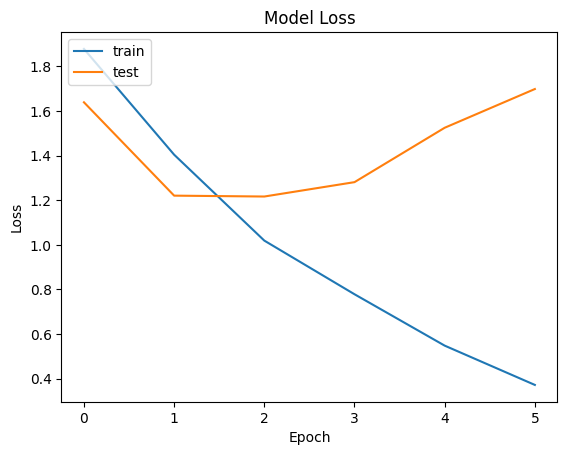

In [ ]:
print("GRU Model\n\n")
acc, val_acc = getAccuracy(GRU_model("task"), X_train1, y_train1)
Results_Task1['GRU']={'Accuracy':acc[-1],'Val_Accuracy':val_acc[-1]}

CNN Model


Epoch 1/40
71/71 [==============================] - 13s 141ms/step - loss: 1.8670 - accuracy: 0.2318 - val_loss: 1.6413 - val_accuracy: 0.3487
Epoch 2/40
71/71 [==============================] - 4s 61ms/step - loss: 1.3770 - accuracy: 0.4820 - val_loss: 1.2947 - val_accuracy: 0.5130
Epoch 3/40
71/71 [==============================] - 2s 34ms/step - loss: 0.8030 - accuracy: 0.7151 - val_loss: 1.2486 - val_accuracy: 0.5551
Epoch 4/40
71/71 [==============================] - 2s 33ms/step - loss: 0.3717 - accuracy: 0.8811 - val_loss: 1.5042 - val_accuracy: 0.5471
Epoch 5/40
71/71 [==============================] - 2s 31ms/step - loss: 0.1167 - accuracy: 0.9702 - val_loss: 1.8830 - val_accuracy: 0.5431
Epoch 6/40
77/77 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       anger       0.43      0.45      0.44       374
     disgust       0.60      0.57      0.58       365
        fear       0.58      0.76      0.66       349


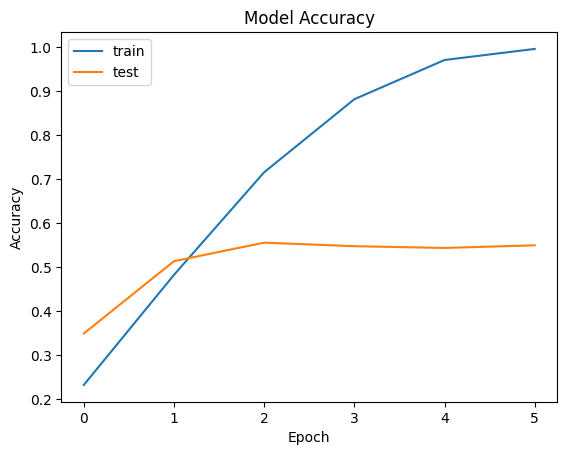

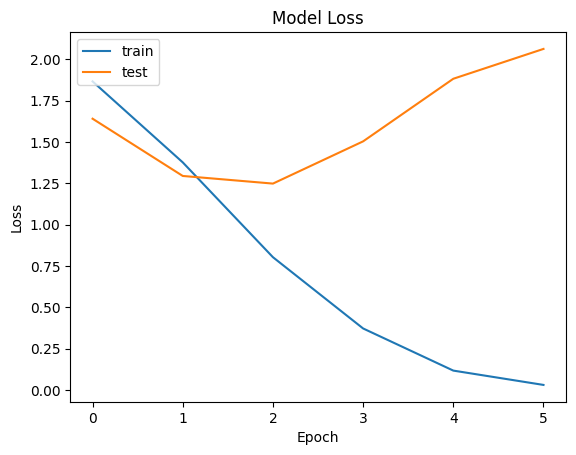

NameError: ignored

In [ ]:
print("CNN Model\n\n")
acc, val_acc = getAccuracy(CNN_model("task1"), X_train1, y_train1)
Results_Task1['CNN']={'Accuracy':acc[-1],'Val_Accuracy':val_acc[-1]}

In [ ]:
Multitask_Results_Task1 = {}
Multitask_Results_Task2 = {}
alpha = 0.185

In [ ]:
from keras import backend as K
def pearson_r(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.sum(xm * ym)
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = K.sqrt(x_square_sum * y_square_sum)
    r = r_num / r_den
    return K.mean(r)

In [ ]:
def create_multihead_LSTM_model(X):
    #Shared Layers
    Input_layer       = Input(shape = X.shape[1], name="Input_layer")
    Embedding_layer   = Embedding(VOCAB_SIZE, EMBEDDING_DIM,weights = [embedding_matrix], trainable=True, input_length=X.shape[1], name="Embedding_layer")(Input_layer)
    #Embedding_layer  = Embedding(VOCAB_SIZE,EMBEDDING_DIM, input_length=X.shape[1], name="Embedding_layer")(Input_layer)
    LSTM_layer1       = LSTM(128,activation='relu', return_sequences=True, name="LSTM_layer1" )(Embedding_layer)
    LSTM_layer2       = LSTM(128,activation='relu', name="LSTM_layer2")(LSTM_layer1)
    Dropout_layer     = Dropout(0.25, name="Dropout_layer")(LSTM_layer2)

    #Task Specific Layer for Task 1
    Dense_layer1a     = Dense(128,activation='relu', name="Dense_layer1a")(Dropout_layer)
    Dense_layer1b     = Dense(100,activation='relu', name="Dense_layer1b")(Dense_layer1a)

    # Predictions for each task
    predictions_task1 = Dense(7, activation='softmax', name="predictions_task1")(Dense_layer1b)
    # predictions_task2 = Dense(1, name="predictions_task2")(Dense_layer2b)

    model= tf.keras.models.Model(Input_layer, predictions_task1)
    model.compile( loss= {'predictions_task1':'categorical_crossentropy' },
                   loss_weights=[alpha,1-alpha],
                   optimizer='adam',
                   metrics={'predictions_task1':'accuracy'  },
                 )
    return model


In [ ]:
Multihead_LSTM_model = create_multihead_LSTM_model(X_train_encoded)

In [ ]:
Multihead_LSTM_model_history = Multihead_LSTM_model.fit(X_train_encoded, Y_train_encoded, epochs=40, batch_size=64,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/40
105/105 [==============================] - 28s 235ms/step - loss: 0.3346 - accuracy: 0.2601 - val_loss: 0.2979 - val_accuracy: 0.3946
Epoch 2/40
105/105 [==============================] - 17s 162ms/step - loss: 0.2461 - accuracy: 0.5079 - val_loss: 0.2659 - val_accuracy: 0.4658
Epoch 3/40
105/105 [==============================] - 17s 165ms/step - loss: 0.1998 - accuracy: 0.6055 - val_loss: 0.2455 - val_accuracy: 0.5369
Epoch 4/40
105/105 [==============================] - 17s 156ms/step - loss: 0.1517 - accuracy: 0.7080 - val_loss: 0.2530 - val_accuracy: 0.5356
Epoch 5/40
105/105 [==============================] - 15s 143ms/step - loss: 0.1259 - accuracy: 0.7650 - val_loss: 0.2624 - val_accuracy: 0.5369
Epoch 6/40
105/105 [==============================] - 15s 145ms/step - loss: 0.0902 - accuracy: 0.8295 - val_loss: 0.2862 - val_accuracy: 0.5436
